In [43]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 100)  
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [45]:
#uploading the dataset
df= pd.read_csv('HR data.csv')

In [8]:
#printing the data
df

,Age,Attrition,BusinessTravel,DailyRate,Department,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,...,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,...,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,...,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,...,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,...,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,...,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,...,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,...,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,...,2,9,6,0,8


In [46]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [47]:
df.describe

<bound method NDFrame.describe of       Age Attrition     BusinessTravel  DailyRate              Department  ...  WorkLifeBalance  \
0      41       Yes      Travel_Rarely       1102                   Sales  ...                1   
1      49        No  Travel_Frequently        279  Research & Development  ...                3   
2      37       Yes      Travel_Rarely       1373  Research & Development  ...                3   
3      33        No  Travel_Frequently       1392  Research & Development  ...                3   
4      27        No      Travel_Rarely        591  Research & Development  ...                3   
...   ...       ...                ...        ...                     ...  ...              ...   
1465   36        No  Travel_Frequently        884  Research & Development  ...                3   
1466   39        No      Travel_Rarely        613  Research & Development  ...                3   
1467   27        No      Travel_Rarely        155  Research & Development  

In [48]:
#removing unnecessary columns.
columns_to_remove = ["EmployeeCount", "WorkLifeBalance", "StandardHours","EnvironmentSatisfaction","Over18","PercentSalaryHike","StockOptionLevel"]
df = df.drop(columns_to_remove, axis=1)

In [14]:
df.shape

(1470, 28)

In [49]:
#Giving the columns new names
new_column_names = {
    "Age": "Employee Age",
    "Attrition": "Employee Turnover",  
    "BusinessTravel": "Business Trip Frequency",
    "DailyRate": "Daily Pay Rate",
    "Department": "Employee Department",
    "DistanceFromHome": "Distance from Workplace", 
    "Education": "Education Level",
    "EducationField": "Field of Study",
    "EmployeeNumber": "Employee ID",  
    "Salary": "Employee Salary",
    "Gender": "Employee Gender",
    "JobRole" : "Job Role"
}
df = df.rename(columns=new_column_names)
df.columns

Index(['Employee Age', 'Employee Turnover', 'Business Trip Frequency', 'Daily Pay Rate',
       'Employee Department', 'Distance from Workplace', 'Education Level', 'Field of Study',
       'Employee ID', 'Employee Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'Job Role',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [50]:
#finding duplicates
duplicate = df[df.duplicated()]

# Print the duplicate rows
if len(duplicate) > 0:
    print("There are duplicate rows in the data")
    print(duplicates.head())
else:
    print("No duplicate rows found")

No duplicate rows found


In [51]:
#Sanitize specific columns
df["Employee Turnover"] = df["Employee Turnover"].map({"Yes": 1, "No": 0})


In [52]:
#checking for null values
missing_values = df.isnull().sum()
print(missing_values)

Employee Age                0
Employee Turnover           0
Business Trip Frequency     0
Daily Pay Rate              0
Employee Department         0
Distance from Workplace     0
Education Level             0
Field of Study              0
Employee ID                 0
Employee Gender             0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
Job Role                    0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PerformanceRating           0
RelationshipSatisfaction    0
TotalWorkingYears           0
TrainingTimesLastYear       0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


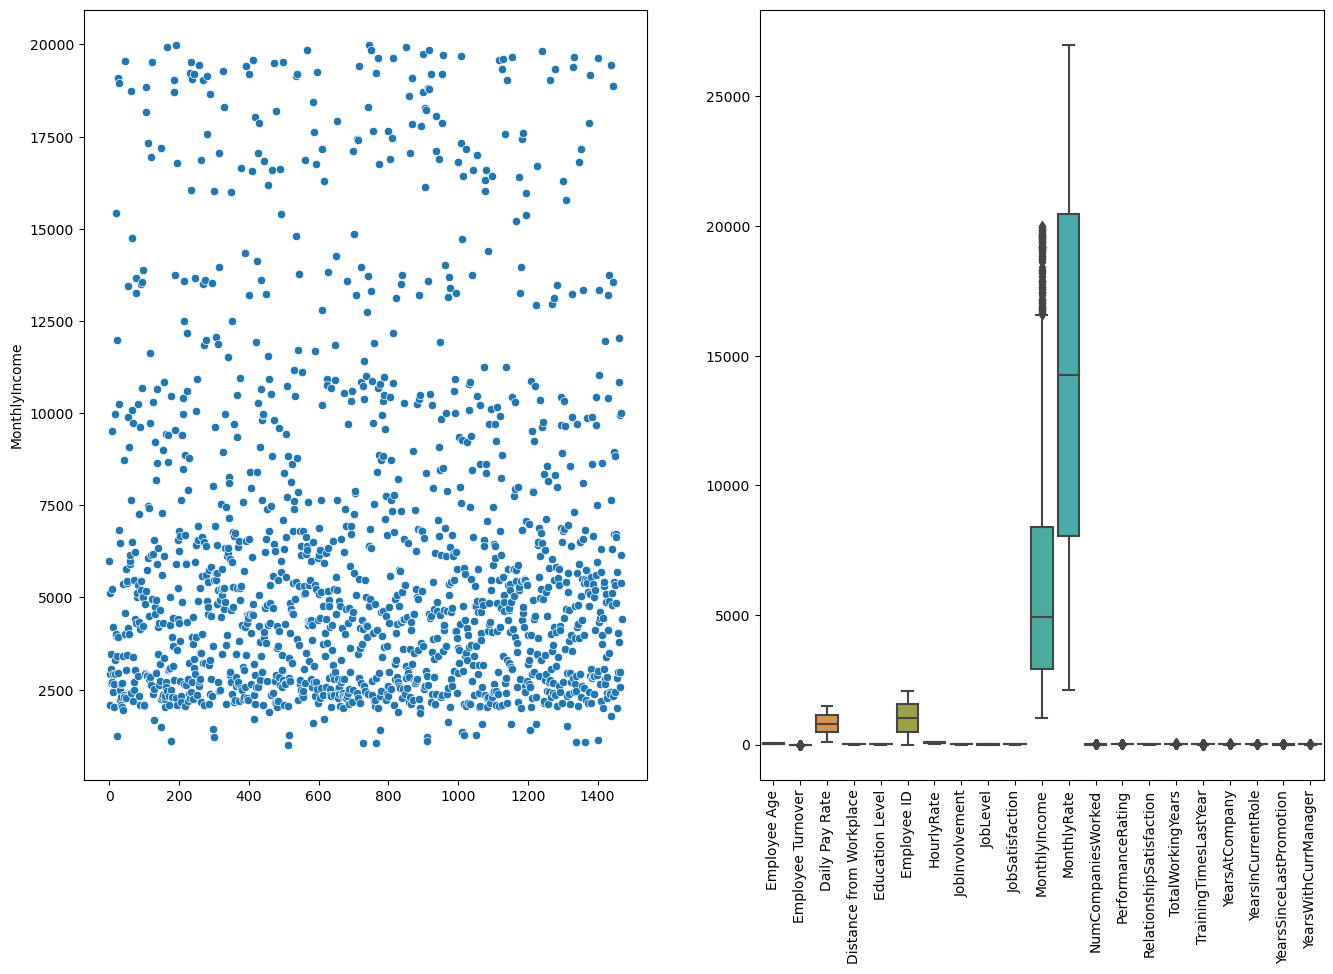

In [54]:
#Outlier Detection with Boxplot and Scatterplot
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
sns.scatterplot(df['MonthlyIncome'])
plt.subplot(1,2,2)
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

In [55]:
#Outlier deletion with IQR
Q1= df['MonthlyIncome'].quantile(0.25)
Q3= df['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
clean_data=df[(df['MonthlyIncome']>=lower) & (df['MonthlyIncome']<=upper)]

clean_data.reset_index()

,index,Employee Age,Employee Turnover,Business Trip Frequency,Daily Pay Rate,...,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,Travel_Rarely,1102,...,0,6,4,0,5
1,1,49,0,Travel_Frequently,279,...,3,10,7,1,7
2,2,37,1,Travel_Rarely,1373,...,3,0,0,0,0
3,3,33,0,Travel_Frequently,1392,...,3,8,7,3,0
4,4,27,0,Travel_Rarely,591,...,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
1351,1465,36,0,Travel_Frequently,884,...,3,5,2,0,3
1352,1466,39,0,Travel_Rarely,613,...,5,7,7,1,7
1353,1467,27,0,Travel_Rarely,155,...,0,6,2,0,3
1354,1468,49,0,Travel_Frequently,1023,...,3,9,6,0,8


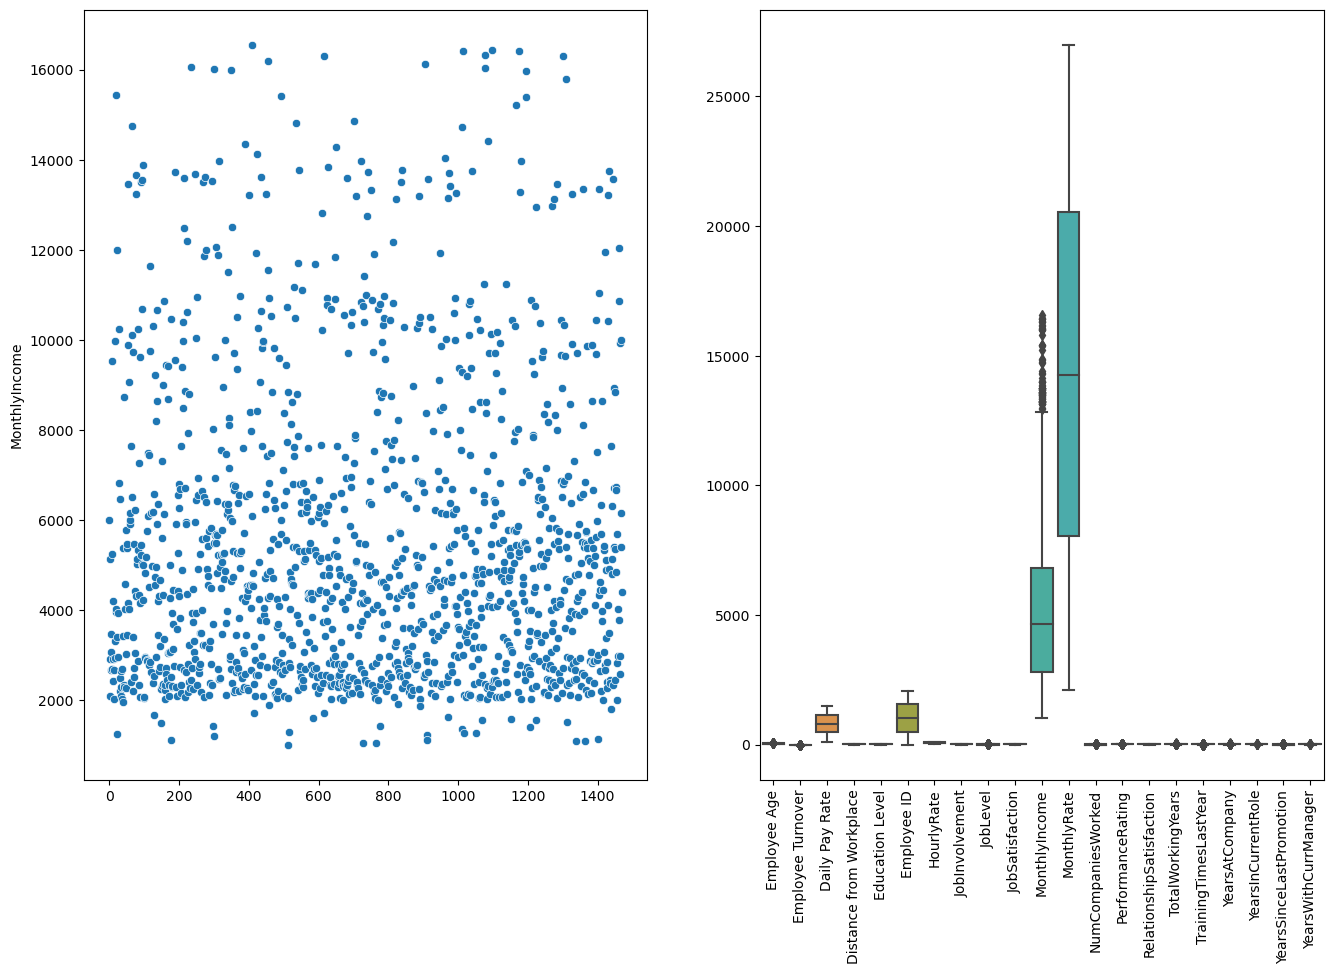

Number of Rows Deleted: 114


In [56]:
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
sns.scatterplot(clean_data['MonthlyIncome'])
plt.subplot(1,2,2)
sns.boxplot(clean_data)
plt.xticks(rotation=90)
plt.show()

print(f'Number of Rows Deleted: {df.shape[0] - clean_data.shape[0]}')

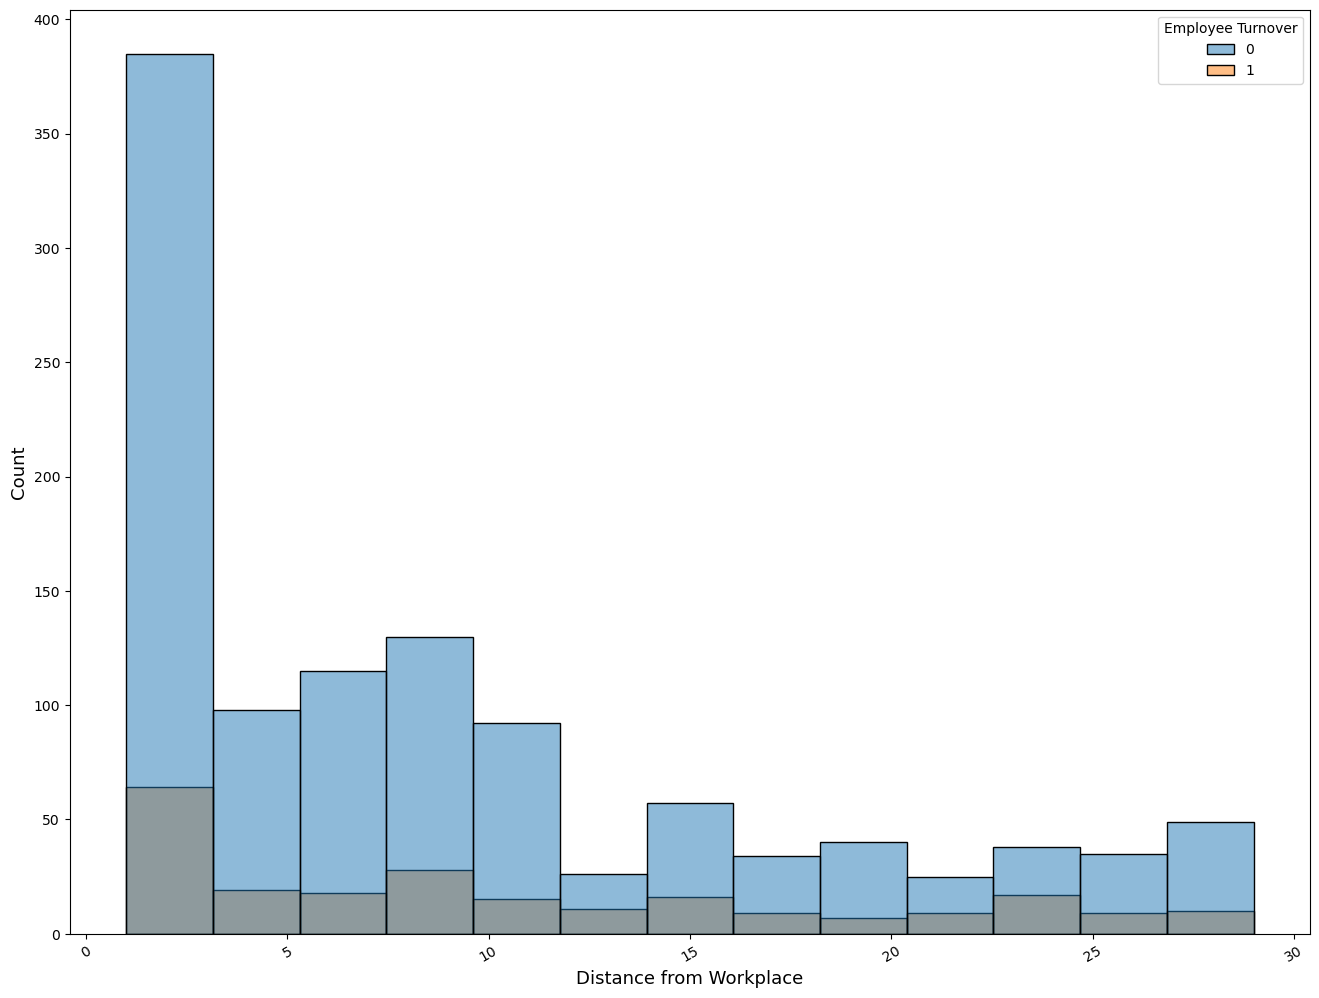

In [58]:
#Employee turnover vs distance from home
plt.figure(figsize=(16,12))
sns.histplot(clean_data,x='Distance from Workplace',hue='Employee Turnover')
plt.xticks(rotation=30)
plt.xlabel('Distance from Workplace', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()

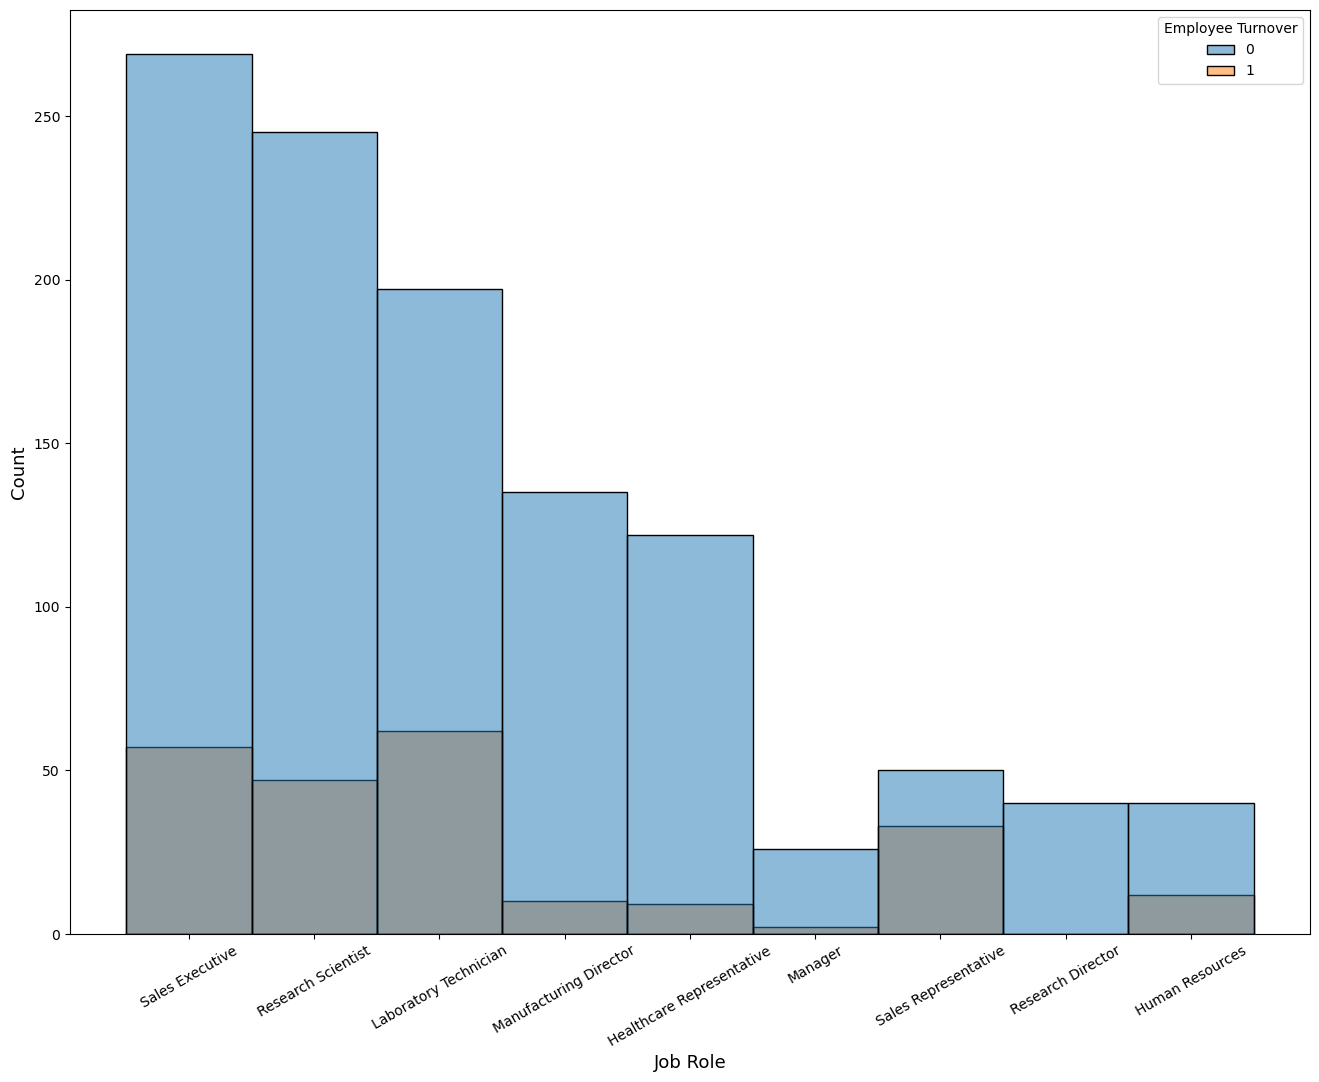

In [61]:
##Employee turnover vs Job role
plt.figure(figsize=(16,12))
sns.histplot(clean_data,x='Job Role',hue='Employee Turnover')
plt.xticks(rotation=30)
plt.xlabel('Job Role', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()

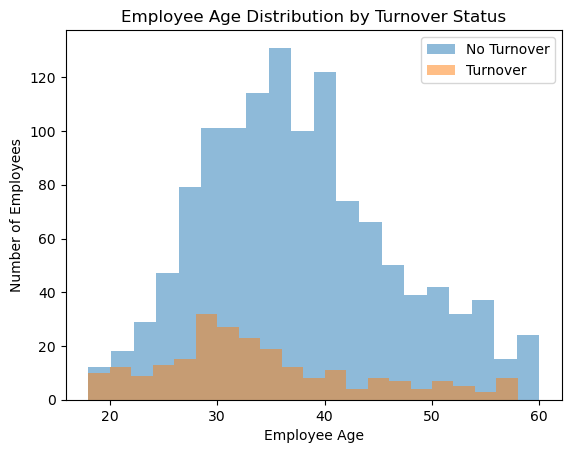

In [66]:
#Employee turnover vs age
plt.hist(df[df["Employee Turnover"] == 0]["Employee Age"], bins=20, alpha=0.5, label="No Turnover")
plt.hist(df[df["Employee Turnover"] == 1]["Employee Age"], bins=20, alpha=0.5, label="Turnover")
plt.xlabel("Employee Age")
plt.ylabel("Number of Employees")
plt.title("Employee Age Distribution by Turnover Status")
plt.legend()
plt.show()


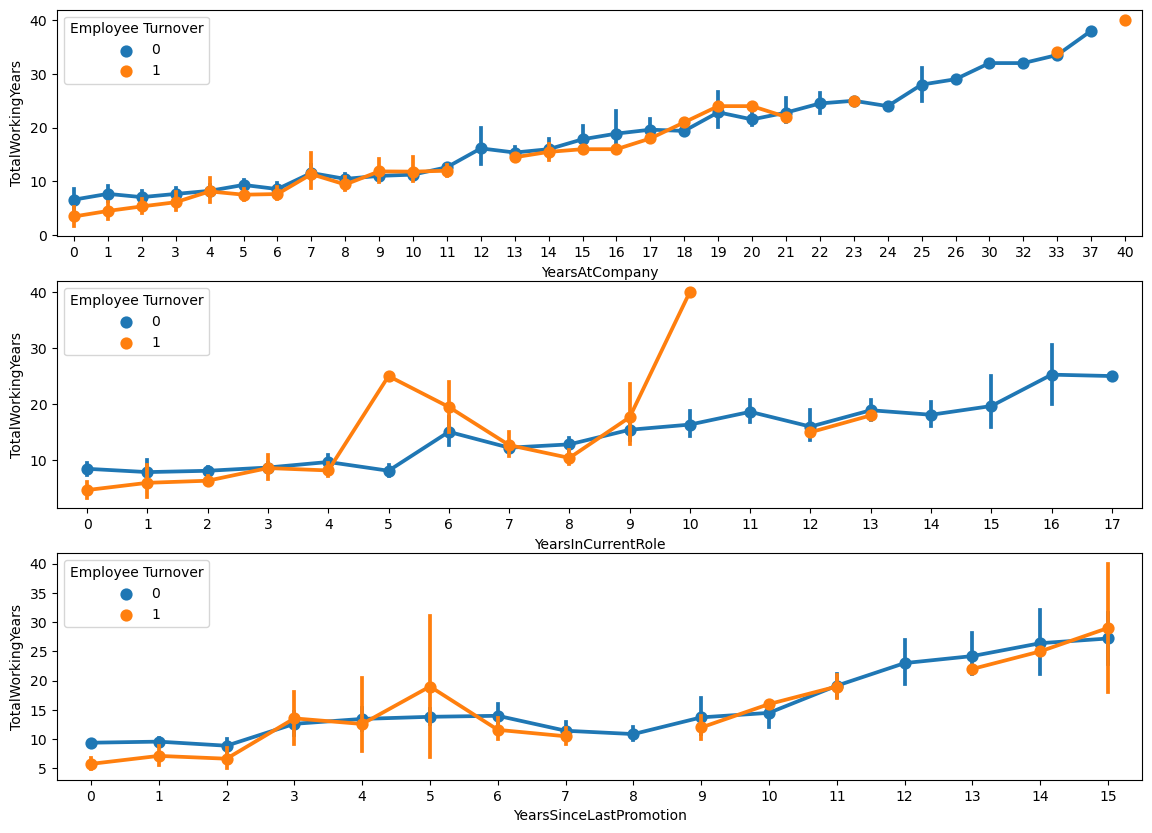

In [67]:
##Employee turnover vs Employee history
columns=['YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion']

fig,axes=plt.subplots(nrows=3,ncols=1,figsize=(14,10))
for i,col in enumerate(columns):
    sns.pointplot(x=clean_data[col], y=clean_data['TotalWorkingYears'],ax=axes[i], hue=clean_data['Employee Turnover'])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('TotalWorkingYears')

plt.show()